<a href="https://colab.research.google.com/github/Dezyderata/NAI_lab1/blob/master/Copy_of_lab1_szablon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laboratorium 1: NAI
Wprowadzenie do algorytmów genetycznych na przykładzie problemu komiwojażera.

In [0]:
import numpy as np, random, operator
import pandas as pd
import matplotlib.pyplot as plt
from random import sample, randint

## Stworzenie klas i wymaganych funkcji

In [0]:
# Klasa reprezentująca pojedyncze miasto, miasto reprezentowane jest przez 
# współrzędne x, y.
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        # Zad 1: Oblicz odległość euklidesową pomiędzy miastami - 1 ptk
        distance = 0
        distance = ((city.x - self.x)**2 + (city.y - self.y)**2)**0.5
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [0]:

# Klasa obliczająca dopasowanie wykorzystując miarę odległości.
class Fitness:
    def __init__(self, route):
        # Route jest to lista obiektow City, o wspolrzednych x i y
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            # Zad 2. Oblicz całkowitą trasę (route) - 1 ptk
            counter = 1
            for city in self.route:
                if counter == len(self.route):
                    pathDistance += city.distance(self.route[0])
                else:
                    pathDistance += city.distance(self.route[counter])
                    counter += 1
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            # Funkcja dopasowania jest odwrotnością długości trasy.
            # W problemie komiwojażera minimalizujemy odlegość między miastami,
            # stąd im większa jest wartość funkcji dopasowania tym lepiej.
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [0]:
# Zad 2. Przykladowa lista miast - sprawdzenie czy funkcja Fitness poprawnie oblicza odleglosc
assert(City(1,2).distance(City(5, 5)) == City(5,5).distance(City(1,2)) == 5)
assert(Fitness([City(0,0), City(1, 0), City(1, 1), City(0, 1)]).routeDistance() == 4)
assert(Fitness([City(0,0),City(0,2), City(0, 4), City(0, 6), City(0, 8)]).routeDistance() == 16)

## Stwórz populację początkową

In [0]:
def initialPopulation(popSize, cityList):
    # popSize - rozmiar populacji początkowej
    # cityList - lista miast
    population = []
    for pop in range(popSize):
        population.append(sample(cityList, len(cityList)))
    # Zadanie 3: Stwórz populację początkową, zwróć listę list populacji.
    # Wskazowka: Wykorzystaj funkcję `random.sample` - 1 ptk
    return population


## Implementacja algorytmu genetycznego

In [0]:
# Obliczanie funkcji dopasowania dla populacji. Zwracany jest posortowany słownik,
# względem malejącej funkcji dopasowania.
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [0]:
def selection(popRanked, eliteSize):
    # Zadanie 4: Zaimplementuj wybrany algorytm selekcji, ktory zwroci liste 
    # indeksow z populacji, ktore beda pelnily funkcje rodzica dla nastepnego pokolenia.
    # Opcje: 1) selekcja ruletkowa: proporcjonalna wartosc do wartosci funkcji
    # przystosowania, koniecznosc skalowania 2) Rangowa - zalezna od rangi - 
    # numeru na liscie posortowanej wzgledem przystosowania
    # 3) Turniejowa - wielokrotny wybor najlepszego osobnika z losowo wybieranej 
    # podpoulacji az do skompletowania populacji potomej
    # - 2 ptk
    #Turniej
    selectionResults = []
    for i in range(eliteSize):
      selectionResults.append(popRanked[i][0])
    for i in range(len(popRanked) - eliteSize):
      sam = sample(popRanked, 7)
      winer = max(sam, key = lambda x : x[1])[0]
      selectionResults.append(winer)
    return selectionResults

In [0]:

# Stworzenie zbioru rodzicow, ktory bedzie wykorzystany w reprodukcji.
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [0]:
def breed(parent1, parent2):
    # Zdanie 5: Zaimplementuj operacje krzyzowania - 2 ptk
    # Przyklad:
    # parent1 = [1, 2, 3, 4, 5, *6*, *7*, *8*, 9]
    # parent2 = [9, 8, 7, 6, 5, 4, 3, 2, 1]
    # child = [9, 5, 4, 3, 2, *6*, *7*, *8*, 1]
    visited = set()
    border1 = randint(0,len(parent1)-1)
    border2 = randint(border1+1, len(parent1))
    lparent = len(parent1)
    child = [0]*len(parent1)
    counter = border1
    for i in range(border1, border2):
        child[i] = parent1[i]
        visited.add(parent1[i])
    j = border2%lparent
    k = j
    while k != border1:
      if parent2[j] not in visited:
        child[k] = parent2[j]
        k = (k+1)%lparent
      j = (j+1)%lparent
        
    return child        
        


In [0]:
    parent1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    parent2 = [9, 8, 7, 6, 5, 4, 3, 2, 1]
    print(breed(parent1, parent2))

[1, 8, 7, 6, 5, 4, 3, 2, 9]


In [0]:
# Funkcja obliczająca krzyżowanie dla całej populacji.
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [0]:
def mutate(individual, mutationRate):
    # Zadanie 6: Zaimplementuj operacje mutacji. Mutacja umozliwia przeszukanie
    # nowej przestrzeni drog. W pojedynczej operacji mutacji zamieniamy dwa miasta
    # losowo wybrane. Miasta sa zamieniane wtedy, kiedy zmienna losowa jest mniejsza
    # od mutationRate. - 2 ptk
    random_variable = random.uniform(0,1)
    if random_variable < mutationRate:
      indexes = random.sample(range(len(individual)), 2)
      individual[indexes[0]], individual[indexes[1]]= individual[indexes[1]], individual[indexes[0]]
    return individual

In [0]:
# Funkcja, ktora uruchamia operacje mutacji dla calej populacji.
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [0]:
# Funkcja zbierajaca wszystkie kroki: ocena przystosowania populacji,
# algorytm selekcji, reprodukca i mutacja. Tworzy nowa generacje.
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [0]:
# Glowna funkcja implementujaca algorytm genetyczny.
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

## Uruchamianie algorytmu genetycznego

In [0]:
def drawSingleRoute(route):
  
  x_coords = []
  y_coords = []
  for city in route:
    x_coords.append(city.x)
    y_coords.append(city.y)
  x_coords.append(route[0].x)
  y_coords.append(route[0].y)
  plt.plot(x_coords, y_coords, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10)
  plt.show()

  # Zadanie 7: Zaimplementuj funkcję rysującą trasę komiwojażera.
  # Hint: możesz wykorzystać biblioteke matplotlib.pyplot - 1 ptk

In [0]:
# Stworzenie listy miast, na poczatek 25 miast

cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

Initial distance: 1926.1564633806627
Final distance: 990.5222633736078


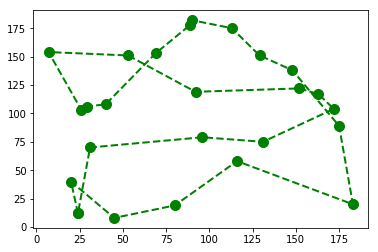

In [0]:
# Uruchomienie algorytmu genetycznego
bestRoute = geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

drawSingleRoute(bestRoute)

## Rysowanie postępu algorytmu genetycznego

In [0]:
# Zadanie 8*: Zaimplementuj funkcje, ktora bedzie rysowala w jaki sposob
# zmienia sie odleglosc w kazdej generacji. Os X niech reprezentuje numer generacji,
# a os Y - niech reprezentuje odleglosc. - 2 ptk
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    steps = []
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    for i in range(0, generations):
        steps.append(1 / rankRoutes(pop)[0][1])
        pop = nextGeneration(pop, eliteSize, mutationRate)
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    steps.append(1 / rankRoutes(pop)[0][1])
    printAll(steps)
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

Initial distance: 2080.5859358166376
Final distance: 989.6299828384424


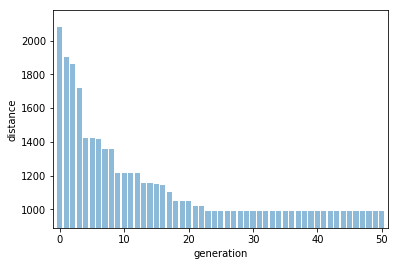

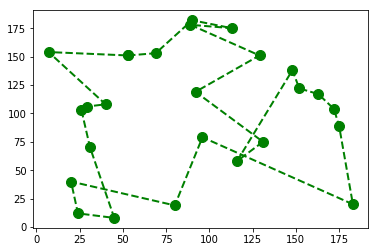

In [0]:
bestRoute2 = geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=50)

drawSingleRoute(bestRoute2)

In [0]:

def printAll(steps):
  
  y_pos = list(range(len(steps)))
  plt.bar(y_pos, steps, align='center', alpha=0.5)
  plt.axis([-1, len(steps), min(steps)-100, max(steps)+100])
  plt.xlabel('generation')
  plt.ylabel('distance')
  
  plt.show()


In [0]:
# Zadanie 9**: Zaimplementuj rozne rodzaje algorytmu selekcji i porownaj
# w jaki sposob zmienia sie funkcja przystosowania, jak szybko otrzymujemy coraz

# to lepsze wyniki. - 3 ptk